## Veri g√∂rselle≈ütirme

### Gerekli k√ºt√ºphaneleri y√ºkle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### SoH Analizi

In [ ]:
soh_df = pd.read_csv("./data/processed/battery_data_soh.csv")

# ƒ∞lk birka√ß satƒ±ra g√∂z at
soh_df.head(15)


battery_id  cycle  capacity       soh  avg_voltage  avg_current  \
0       B0005      1  1.856487  1.000000     3.529829    -1.818702   
1       B0005      3  1.846327  0.994527     3.537320    -1.817560   
2       B0005      5  1.835349  0.988614     3.543737    -1.816487   
3       B0005      7  1.835263  0.988567     3.543666    -1.825589   
4       B0005      9  1.834646  0.988235     3.542343    -1.826114   
5       B0005     11  1.835662  0.988782     3.541335    -1.816811   
6       B0005     13  1.835146  0.988504     3.541025    -1.816791   
7       B0005     15  1.825757  0.983447     3.554133    -1.844341   
8       B0005     17  1.824774  0.982917     3.552936    -1.853973   
9       B0005     19  1.824613  0.982831     3.551206    -1.853590   
10      B0005     21  1.824620  0.982834     3.549292    -1.863380   
11      B0005     24  1.814202  0.977223     3.559759    -1.872969   
12      B0005     26  1.813752  0.976981     3.558082    -1.882610   
13      B0005     28  1.813440  0.976813     3.555692    -1.882537   
14      B0005     30  1.802598  0.970972     3.562747    -1.881794   

    avg_temperature  max_temperature  
0         32.572328        38.982181  
1         32.725235        39.033398  
2         32.642862        38.818797  
3         32.514876        38.762305  
4         32.382349        38.665393  
5         32.434182        38.751695  
6         32.480416        38.820701  
7         32.410462        38.517130  
8         32.346141        38.526268  
9         32.276798        38.526981  
10        32.157094        38.541434  
11        32.364071        38.521975  
12        32.318195        38.582486  
13        32.157090        38.520294  
14        32.044070        38.213586

In [3]:
# Betimleyici istatistikler
soh_df.describe().T

count        mean         std        min         25%  \
cycle            468.0  256.412393  173.789009   1.000000  109.750000   
capacity         468.0    1.559119    0.206228   1.153818    1.387719   
soh              468.0    0.813728    0.113268   0.566893    0.729705   
avg_voltage      468.0    3.491822    0.049540   3.403885    3.456647   
avg_current      468.0   -1.806614    0.104137  -1.999755   -1.889296   
avg_temperature  468.0   32.313125    1.076993  30.102704   31.331219   
max_temperature  468.0   39.259500    1.468938  36.372088   38.038990   

                        50%         75%         max  
cycle            234.500000  390.000000  613.000000  
capacity           1.524251    1.742572    2.035338  
soh                0.800421    0.916427    1.000000  
avg_voltage        3.494967    3.534883    3.573551  
avg_current       -1.806314   -1.733999   -1.516972  
avg_temperature   32.304421   33.320027   34.490494  
max_temperature   38.989287   40.749505   42.007540

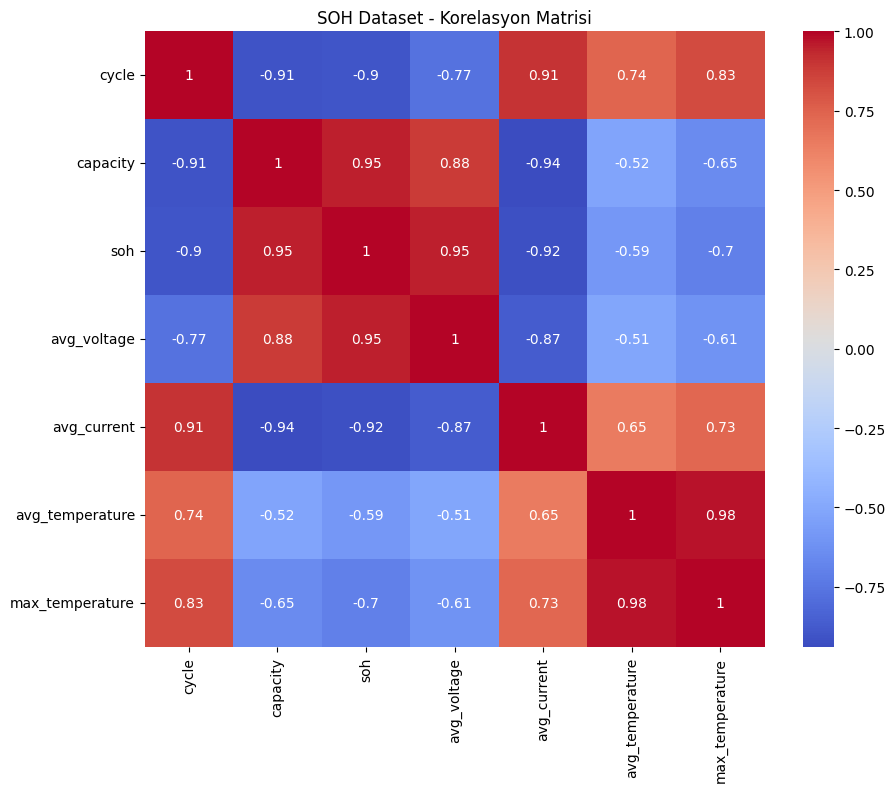

In [4]:
# Korelasyon matrisi
# Sadece sayƒ±sal s√ºtunlarƒ± se√ßerek korelasyon matrisi olu≈ütur
numeric_cols = soh_df.select_dtypes(include='number')
corr =numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("SOH Dataset - Korelasyon Matrisi")
plt.show()

In [5]:
corr

cycle  capacity       soh  avg_voltage  avg_current  \
cycle            1.000000 -0.908945 -0.902096    -0.769678     0.906810   
capacity        -0.908945  1.000000  0.948643     0.879654    -0.940896   
soh             -0.902096  0.948643  1.000000     0.951148    -0.922633   
avg_voltage     -0.769678  0.879654  0.951148     1.000000    -0.870341   
avg_current      0.906810 -0.940896 -0.922633    -0.870341     1.000000   
avg_temperature  0.736437 -0.518853 -0.585955    -0.513493     0.646478   
max_temperature  0.830045 -0.646042 -0.701431    -0.613205     0.733641   

                 avg_temperature  max_temperature  
cycle                   0.736437         0.830045  
capacity               -0.518853        -0.646042  
soh                    -0.585955        -0.701431  
avg_voltage            -0.513493        -0.613205  
avg_current             0.646478         0.733641  
avg_temperature         1.000000         0.975346  
max_temperature         0.975346         1.000000

### üìå √ñne √áƒ±kan ƒ∞li≈ükiler

- **SOH & Capacity:** `+0.95` ‚Üí G√º√ßl√º pozitif ili≈üki, kapasite SOH'un iyi bir g√∂stergesidir.
- **SOH & Avg Voltage:** `+0.95` ‚Üí Y√ºksek voltaj, daha y√ºksek SOH ile ili≈ükilidir.
- **SOH & Avg Current:** `-0.92` ‚Üí Artan akƒ±m, SOH'un d√º≈ümesine neden olur.
- **SOH & Max Temperature:** `-0.70` ‚Üí Y√ºksek sƒ±caklƒ±klar SOH‚Äôu olumsuz etkiler.

### üå°Ô∏è Sƒ±caklƒ±k Deƒüi≈ükenleri
- **Avg Temp & Max Temp:** `+0.98` ‚Üí Birbirine √ßok yakƒ±n deƒüi≈ükenler, dikkatli kullanƒ±lmalƒ± (multicollinearity riski).

### üîÅ D√∂ng√º Sayƒ±sƒ±
- **Cycle & SOH:** `-0.90` ‚Üí D√∂ng√º arttƒ±k√ßa batarya saƒülƒ±ƒüƒ± azalƒ±r.
- **Cycle & Avg Current:** `+0.91` ‚Üí Kullanƒ±m arttƒ±k√ßa ortalama akƒ±m da artar.


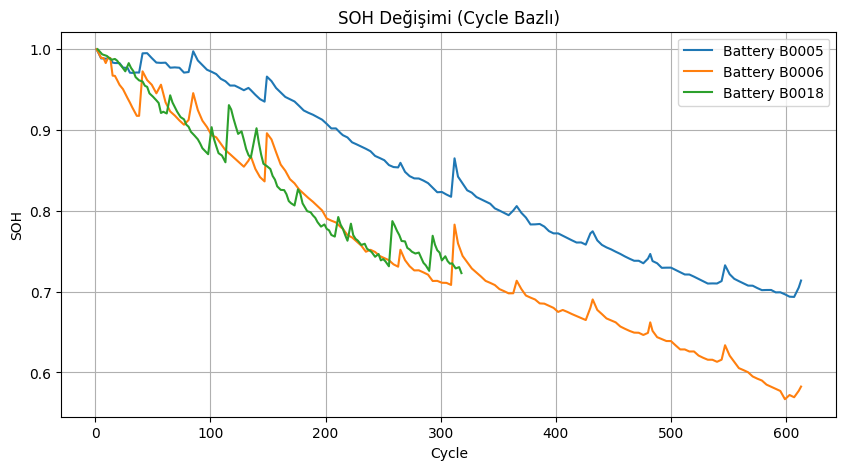

In [6]:
# Kapasite ve SOH deƒüi≈üimi
plt.figure(figsize=(10, 5))
for bat_id in soh_df['battery_id'].unique():
    bat_data = soh_df[soh_df['battery_id'] == bat_id]
    plt.plot(bat_data['cycle'], bat_data['soh'], label=f'Battery {bat_id}')
plt.xlabel('Cycle')
plt.ylabel('SOH')
plt.title('SOH Deƒüi≈üimi (Cycle Bazlƒ±)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.feature_selection import mutual_info_regression

X = soh_df[['avg_voltage', 'avg_current', 'avg_temperature', 'max_temperature']]
y = soh_df['soh']
mi = mutual_info_regression(X, y)
print(dict(zip(X.columns, mi)))

{'avg_voltage': 1.7738147609991928, 'avg_current': 1.8658046322874715, 'avg_temperature': 0.7340677054702938, 'max_temperature': 0.8954207858333976}


üìä Mutual Information (MI) Yorumu

Mutual information (kar≈üƒ±lƒ±klƒ± bilgi), bir deƒüi≈ükenin hedef deƒüi≈üken (burada soh) hakkƒ±nda ne kadar bilgi saƒüladƒ±ƒüƒ±nƒ± √∂l√ßer. Deƒüer ne kadar y√ºksekse, deƒüi≈ükenin hedef √ºzerinde etkisi o kadar fazladƒ±r.

üìå Sonu√ßlar:
√ñzellik	MI Skoru	Yorum
avg_current	1.87	En y√ºksek bilgi katkƒ±sƒ± ‚Üí SoH tahmininde √ßok deƒüerli.
avg_voltage	1.77	√áok g√º√ßl√º bilgi ta≈üƒ±yor, SoH ile fiziksel olarak da anlamlƒ± ili≈ükisi var.
max_temperature	0.89	Orta d√ºzeyde katkƒ± ‚Üí √∂zellikle sƒ±caklƒ±k stresinin etkisini yansƒ±tƒ±yor.
avg_temperature	0.73	En d√º≈ü√ºk MI ‚Üí max_temperature ile birlikte veri tekrarƒ±na neden olabilir.
‚úÖ √ñzellik Se√ßimi √ñnerisi

Model i√ßin a≈üaƒüƒ±daki 3 √∂zelliƒüi kullanman en mantƒ±klƒ±sƒ± olur:

avg_current
avg_voltage
max_temperature
avg_temperature hem korelasyon hem MI a√ßƒ±sƒ±ndan daha zayƒ±f olduƒüu i√ßin dƒ±≈üarƒ±da bƒ±rakƒ±labilir.
capacity ve soh aynƒ± bilgiyi ta≈üƒ±dƒ±ƒüƒ± i√ßin, sadece soh hedef olarak kalmalƒ±.

### SoC Analizi

In [ ]:
soc_df = pd.read_csv("./data/processed/battery_data_soc.csv")

# ƒ∞lk birka√ß satƒ±r
print(soc_df.head(15))

   battery_id  cycle     time   voltage   current  temperature       soc
0       B0005      1    0.000  4.191492 -0.004902    24.330034  1.000000
1       B0005      1   16.781  4.190749 -0.001478    24.325993  0.999996
2       B0005      1   35.703  3.974871 -2.012528    24.389085  0.994298
3       B0005      1   53.781  3.951717 -2.013979    24.544752  0.988851
4       B0005      1   71.922  3.934352 -2.011144    24.731385  0.983392
5       B0005      1   90.094  3.920058 -2.013007    24.909816  0.977918
6       B0005      1  108.281  3.907904 -2.014400    25.105884  0.972437
7       B0005      1  126.453  3.897036 -2.011603    25.317019  0.966967
8       B0005      1  144.641  3.887477 -2.018015    25.509423  0.961475
9       B0005      1  162.844  3.878959 -2.013135    25.703603  0.955992
10      B0005      1  181.016  3.871016 -2.013162    25.887208  0.950519
11      B0005      1  199.219  3.863480 -2.013030    26.077815  0.945036
12      B0005      1  217.391  3.856661 -2.013710  

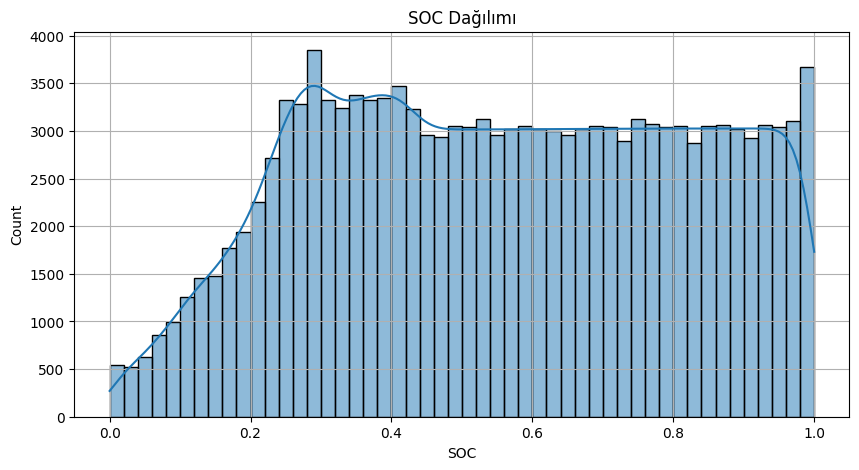

In [8]:
# SOC daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(10, 5))
sns.histplot(soc_df['soc'], bins=50, kde=True)
plt.title("SOC Daƒüƒ±lƒ±mƒ±")
plt.xlabel("SOC")
plt.grid(True)
plt.show()

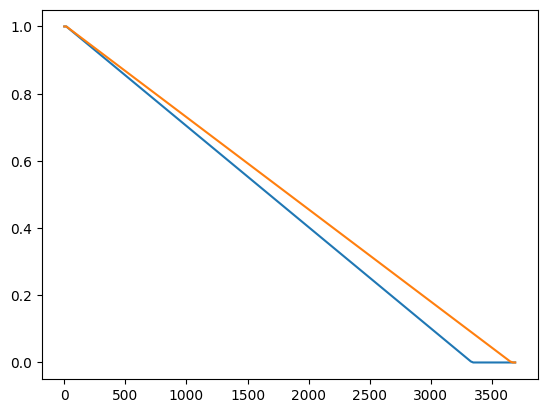

In [ ]:
# Zaman i√ßindeki SOC √∂rneƒüi
for bat in soc_df['battery_id'].unique():
    bat_data = soc_df[(soc_df['battery_id'] == bat) & (soc_df['cycle'] == 1)]
    plt.plot(bat_data['time'], bat_data['soc'], label=f'Battery {bat}')
